<a href="https://colab.research.google.com/github/summit99/Mini-Project/blob/main/Summit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from pickle import dump, load
import seaborn as sns
from PIL import Image


from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')

In [ ]:
df_train.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [7]:
df_train["Class"].value_counts()

Miscellaneous     2801
Christmas_Tree    1539
Jacket             640
Candle             593
Airplane           535
Snowman            361
Name: Class, dtype: int64

In [9]:
plt.figure(figsize = (8,5))

ax = plt.gca()
ax = sns.countplot(df_train['Class'])

NameError: ignored

In [ ]:
Y_train = df_train["Class"]
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_train),
                                                 Y_train)

In [ ]:
class_weights

array([2.0152648 , 1.81815627, 0.70056314, 1.68463542, 0.38492205,
       2.98661127])

In [ ]:
cw = {cls : cw for cw, cls in zip(class_weights, np.unique(Y_train))}

In [ ]:
cw

{'Airplane': 2.015264797507788,
 'Candle': 1.8181562675660483,
 'Christmas_Tree': 0.7005631362356508,
 'Jacket': 1.6846354166666666,
 'Miscellaneous': 0.38492205164822085,
 'Snowman': 2.986611265004617}

In [10]:
PATH = '/content/drive/MyDrive/dataset/train'

In [ ]:
target_size = (150, 150)
X = []
Y = []
for image, label in zip(df_train['Image'], df_train['Class']):
    im = Image.open(PATH + image)
    im = im.resize(target_size)
    im = im.convert('RGB')
    X.append(np.asarray(im))
    im.close()
    Y.append(label)

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

In [ ]:
X_train.shape

(4851, 150, 150, 3)

In [ ]:
y_train.shape

(4851,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [ ]:
X_train.shape

(4851, 67500)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], -1)

### SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(loss='log', warm_start=True)

In [ ]:
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', warm_start=True)

In [ ]:
y_pred = sgd.predict(X_test)

In [ ]:
c_mat = confusion_matrix(y_test, y_pred)

In [ ]:
df_cm = pd.DataFrame(c_mat, index = [i for i in np.unique(y_test)], columns = [i for i in np.unique(y_test)])

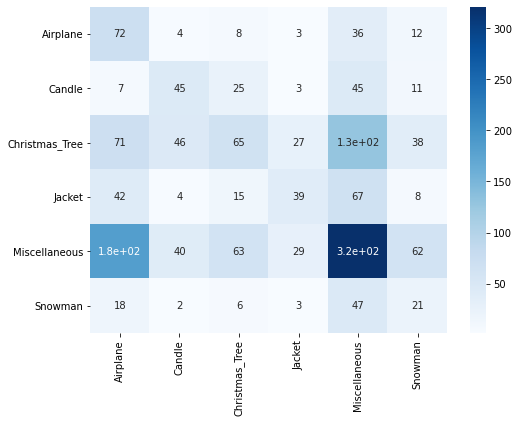

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(df_cm, cmap = 'Blues', annot = True)
plt.show()

### GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'penalty': ['elasticnet'], 'alpha': [0.0001, 0.005, 0.0005, 0.002], 'l1_ratio': [0.15, 0.20, 0.05, 0.1]}
]

In [ ]:
grid_search = GridSearchCV(sgd, param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train, y_train)